## Random Sample imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace nan values.

when should be used ?
It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df = pd.read_csv("train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df["Age"].isnull().sum()

177

In [5]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
def impute_nan(df,variable,random):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    # It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df["Age"].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the sataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [7]:
median = df.Age.median()

In [8]:
median

28.0

In [9]:
impute_nan(df,"Age",median)

In [10]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [11]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [ ]:
mean = df.Age.mean()
df["Age_mean"] = df["Age"].fillna(mean)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

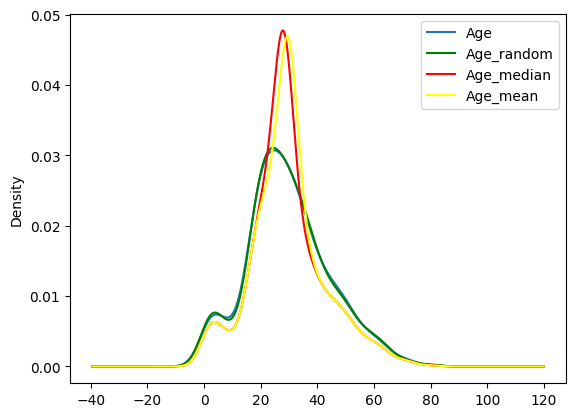

In [28]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_random.plot(kind='kde', ax=ax, color='green') 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
df.Age_mean.plot(kind='kde', ax=ax, color='yellow') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantage of random sample imputation
1. Easy to implement
2. There is less distortion in variance

#### Disadvantage of random sample imputation
1. In Every situation randomness won't work

## Capturing NAN vaues with a new feature

It works well if the data are not missing completely at random

In [30]:
df = pd.read_csv("train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
import numpy as np
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [33]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [38]:
df.Age.median()

28.0

In [35]:
df["Age"].fillna(df.Age.median(),inplace =True)

In [37]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## End of Distribution Imputation

In [40]:
df = pd.read_csv("train.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

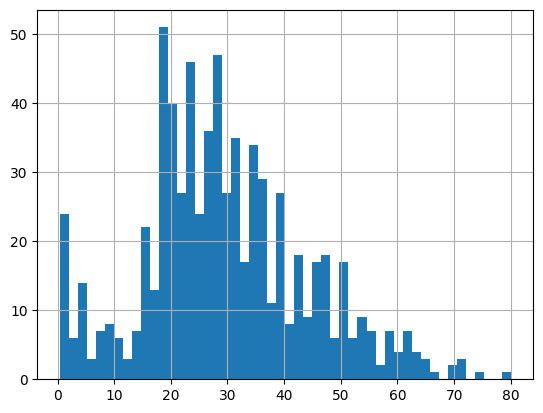

In [41]:
df.Age.hist(bins=50)

In [50]:
extreme = df.Age.mean()+3*df.Age.std()

<AxesSubplot: xlabel='Age'>

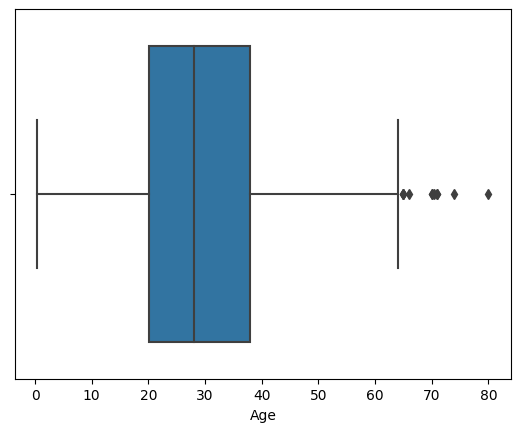

In [49]:
import seaborn as sns
sns.boxplot(x="Age",data=df)

In [51]:
def impute_nan(df, variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [52]:
median = df.Age.median()

In [53]:
impute_nan(df,"Age",median,extreme)

In [54]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot: >

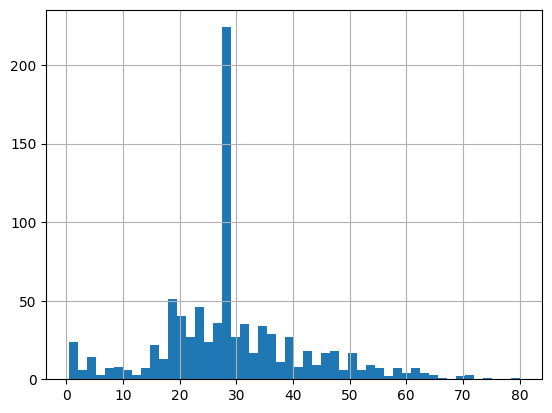

In [56]:
df["Age"].hist(bins=50)

<AxesSubplot: >

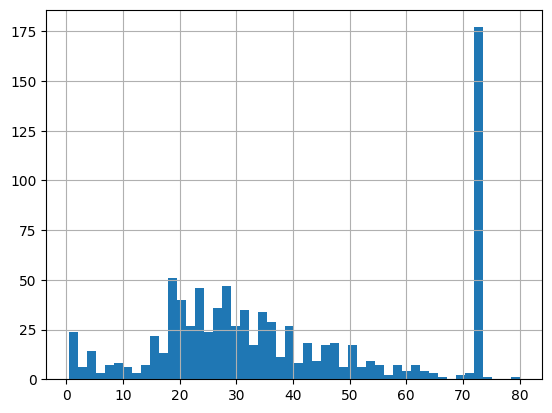

In [58]:
df["Age_end_distribution"].hist(bins=50)

<AxesSubplot: xlabel='Age_end_distribution'>

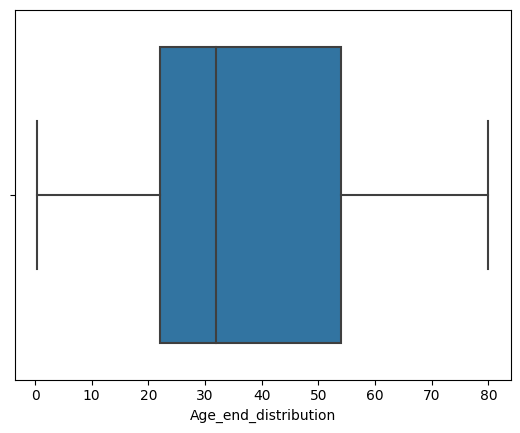

In [60]:
sns.boxplot(x="Age_end_distribution",data=df)